In [17]:
import p_tqdm import p_map
import tqdm.auto import tqdm
import pandas as pd
import calplot
import matplotlib.pyplot as plt
import time
import datetime import datetime, timedelta
import os
from kedro.extras.datasets.pandas import GBQQueryDataSet
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = f"/mnt/imported/code/Analysis_scripts/DS/learntorank/conf/base/creds.json"


In [4]:
os.chdir('/mnt/imported/code/Analysis_scripts/DS/learntorank')
os.getcwd()

'/mnt/imported/code/Analysis_scripts/DS/learntorank'

In [5]:
!ls /mnt/code/airflow/

airflow_run.sh	     FT-LaTam_pipeline.png    __pycache__
example_complex.png  local_executor_dag.py    Teste.R
FT_LaTam_dag.py      local_executor_demo.png  Ximena


In [6]:
df_raw = pd.read_csv(os.getcwd()+'/data/01_raw/protocols_cp.csv')
df_raw

,FIELD_name,FIELD_plantingDate,FIELD_Loc_latitude,FIELD_Loc_longitude,FIELD_isIrrigated,FIELD_harvestDate,FIELD_locationName,Clima
0,ATUCK1_MAMBORE_MENIN_FTNFOX_W22,2022-02-19 00:00:00+00:00,-24.32,-52.53,False,2022-08-20 00:00:00+00:00,Mambore PR BRA,Sub
1,ATUCK1_MEDIAN_VENDRAME_FTNFOX_W22,2022-02-25 00:00:00+00:00,-25.30,-54.09,False,2022-08-18 00:00:00+00:00,Medianeira PR BRA,Sub
2,ATUCK1_RIOBRIL_EVANDRO_FTNFOX_W22,2022-03-20 00:00:00+00:00,-21.80,-54.54,False,NaN,Rio Brilhante MS BRA,Sub
3,DYIDA_Alvorada_Hexa_FTNFOX_W22,2022-02-21 00:00:00+00:00,-12.48,-49.13,False,2022-07-11 01:00:00+00:00,Alvorada TO BRA,Trop
4,GCUUR_PAIQUERE_ANTONIO_FOX,2022-03-23 00:00:00+00:00,-23.31,-51.16,False,2022-09-12 00:00:00+00:00,Londrina PR BRA,Sub
5,RCGASP_CLEVELANDIA_MAYCON_FUN_S22,2022-01-23 00:00:00+00:00,-26.40,-52.35,False,2022-07-01 00:00:00+00:00,Clevelandia PR BRA,Sub
6,RUENO_MONTEALEGRE_PROD1_FTNFOX_W22,2022-03-02 00:00:00+00:00,-18.92,-48.28,False,2022-08-05 00:00:00+00:00,Uberlandia MG BRA,Trop
7,RUENO_RV_ACACIO_FTNFOX_W22,2022-02-27 00:00:00+00:00,-17.79,-50.92,False,2022-07-31 00:00:00+00:00,Rio Verde GO BRA,Trop
8,SSOUZ1_CV_PARAISO_FTNFOX_W22,2022-03-01 00:00:00+00:00,-15.54,-55.16,False,2022-07-31 00:00:00+00:00,Campo Verde MT BRA,Trop
9,SSOUZ1_ROO_OUROBRANCO_FTNFOX_W22,2022-02-22 00:00:00+00:00,-16.46,-54.64,False,2022-07-08 00:00:00+00:00,Rondonopolis MT BRA,Trop


In [7]:
df = df_raw[['FIELD_Loc_longitude','FIELD_Loc_latitude','FIELD_locationName','Clima','FIELD_plantingDate','FIELD_harvestDate']]
df.columns = ['lon', 'lat','loc','weather','seed','harvs']

In [8]:
df = df.loc[[0,1,4,5,6,7,9,11]]
df[['seed','harvs']] = df[['seed','harvs']].apply(pd.to_datetime, format="%Y-%m-%d")

In [9]:
#df=df.loc[[6]]
df

,lon,lat,loc,weather,seed,harvs
0,-52.53,-24.32,Mambore PR BRA,Sub,2022-02-19 00:00:00+00:00,2022-08-20 00:00:00+00:00
1,-54.09,-25.30,Medianeira PR BRA,Sub,2022-02-25 00:00:00+00:00,2022-08-18 00:00:00+00:00
4,-51.16,-23.31,Londrina PR BRA,Sub,2022-03-23 00:00:00+00:00,2022-09-12 00:00:00+00:00
5,-52.35,-26.40,Clevelandia PR BRA,Sub,2022-01-23 00:00:00+00:00,2022-07-01 00:00:00+00:00
6,-48.28,-18.92,Uberlandia MG BRA,Trop,2022-03-02 00:00:00+00:00,2022-08-05 00:00:00+00:00
7,-50.92,-17.79,Rio Verde GO BRA,Trop,2022-02-27 00:00:00+00:00,2022-07-31 00:00:00+00:00
9,-54.64,-16.46,Rondonopolis MT BRA,Trop,2022-02-22 00:00:00+00:00,2022-07-08 00:00:00+00:00
11,-55.73,-12.55,Sorriso MT BRA,Trop,2022-02-08 00:00:00+00:00,2022-06-22 00:00:00+00:00


In [10]:
def runQuery(query): 
      df=GBQQueryDataSet(query, project='location360-datasets').load()
      return df

#num_cores = os.cpu_count()-2
num_cores = 5
yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
seq_date=pd.date_range(start="2021-12-31",end=yesterday, periods=num_cores).to_pydatetime()


#  Wetting-Period Duration 

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

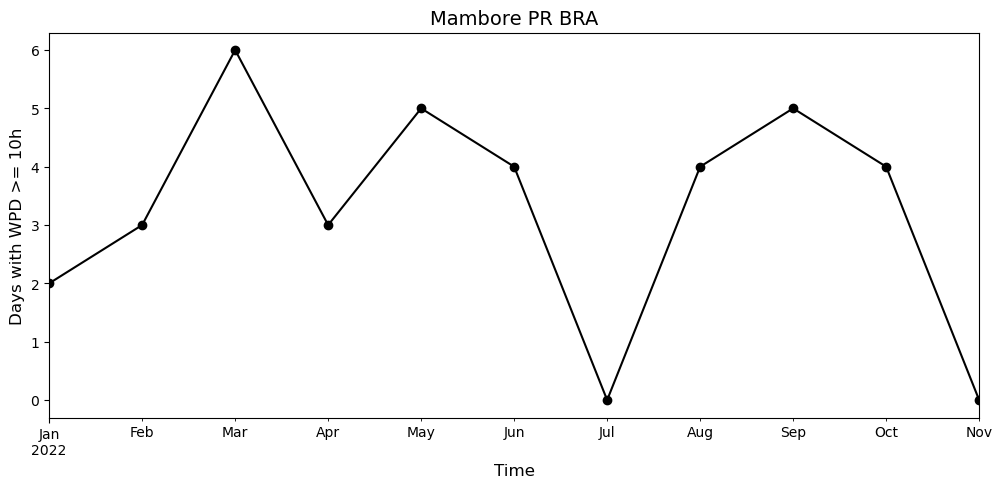

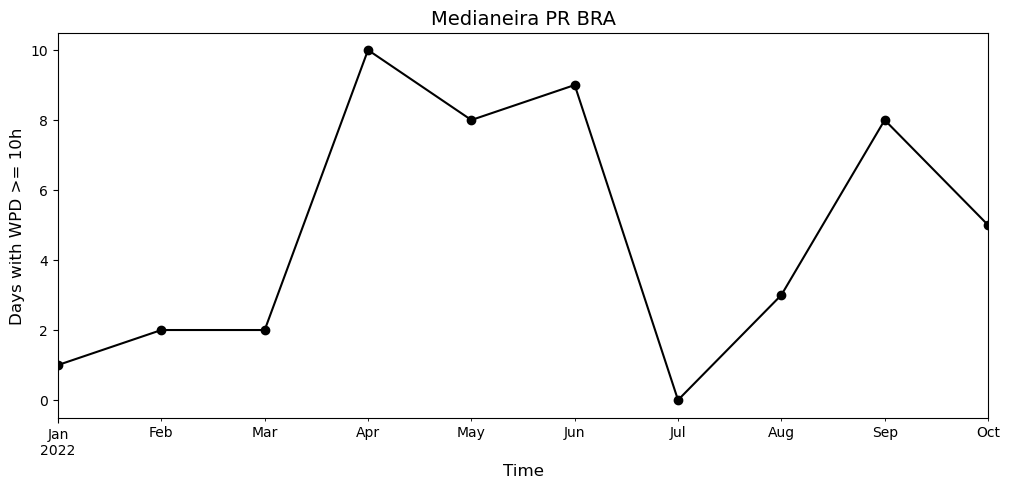

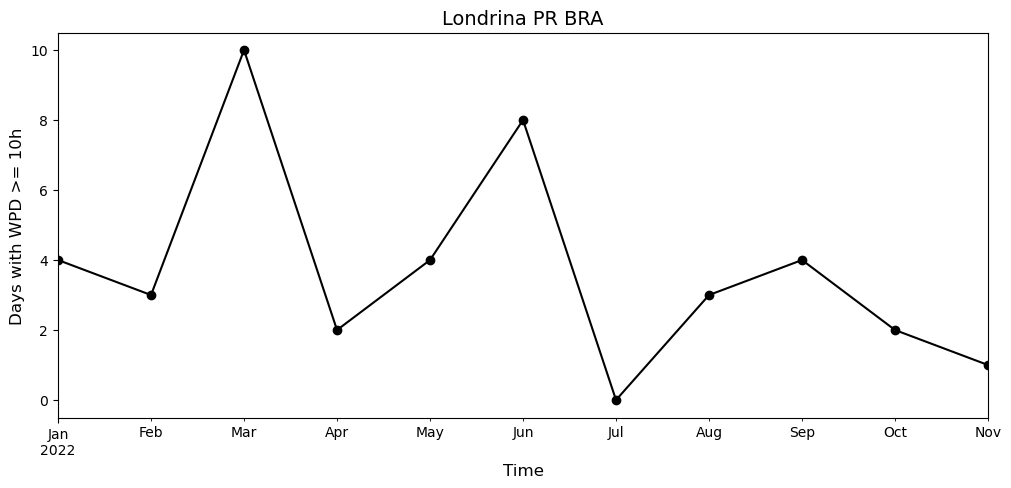

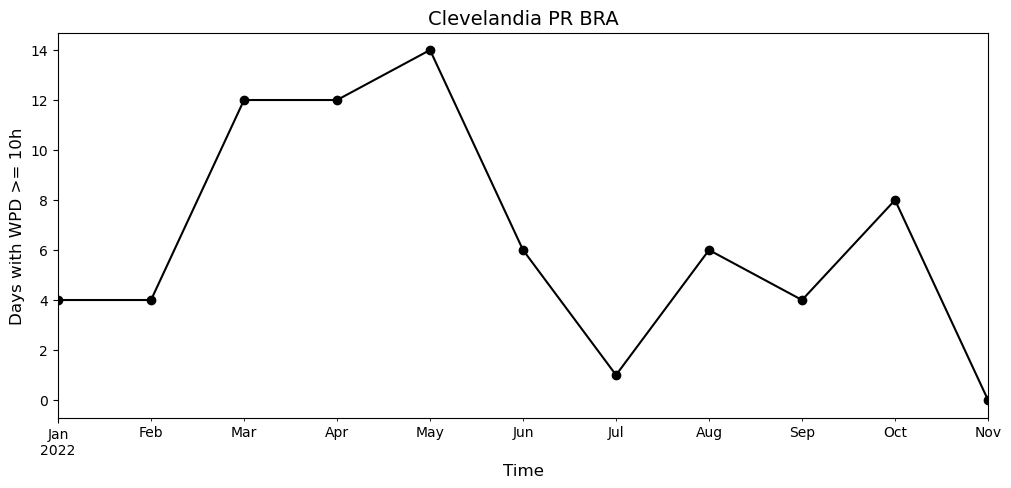

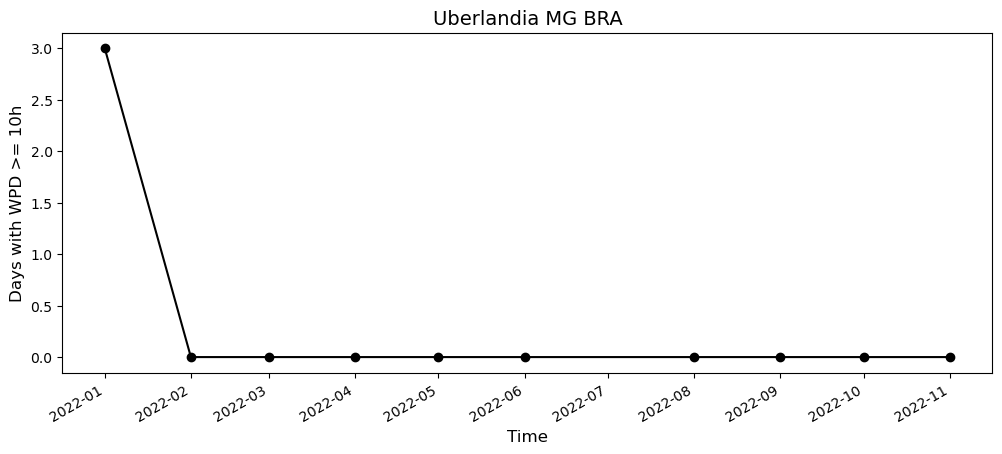

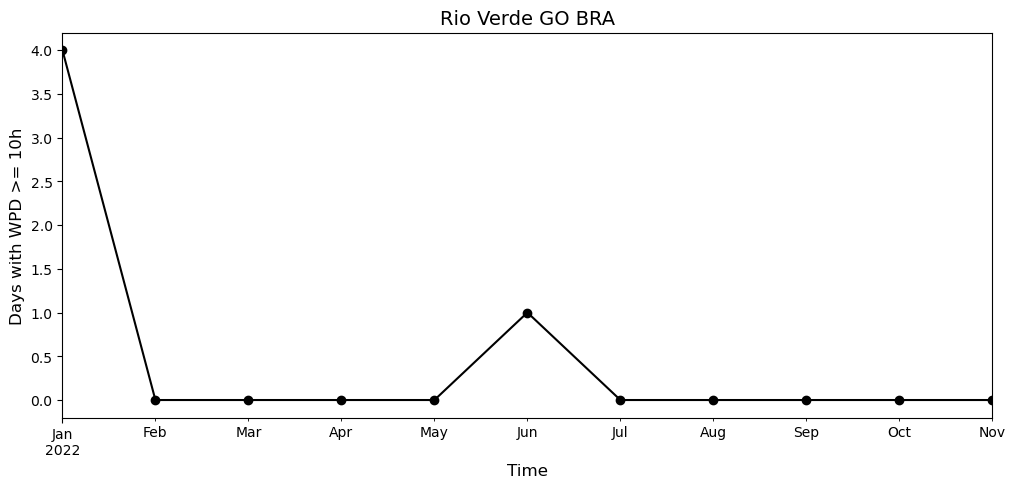

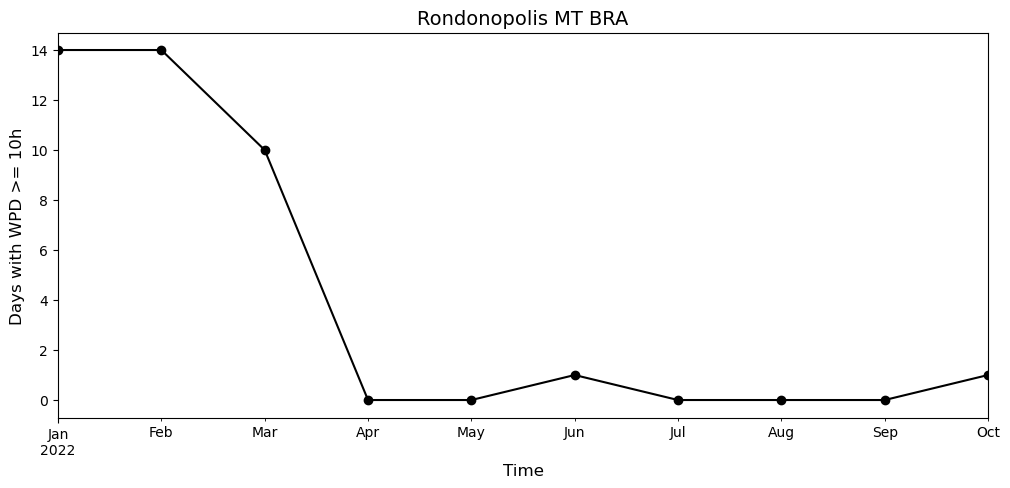

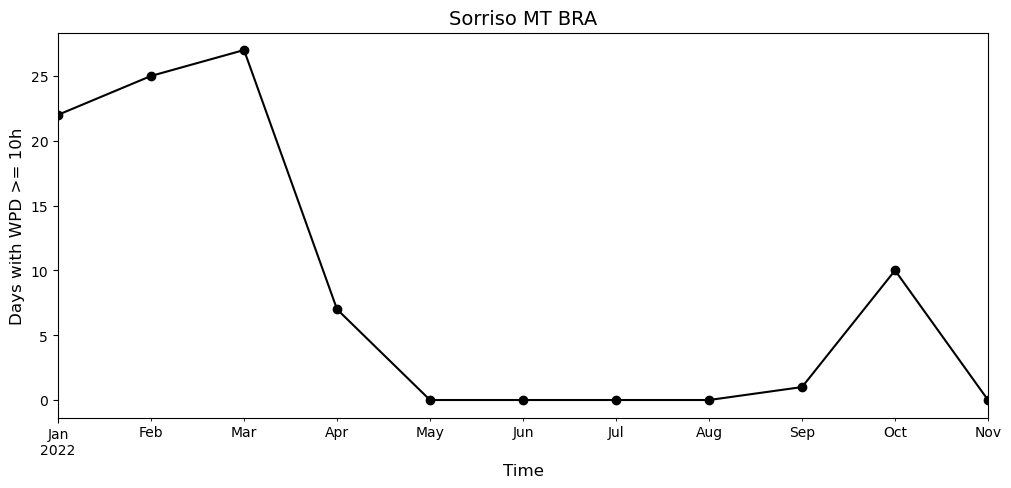

In [11]:
for index, row in df.iterrows():

    t = time.time()
    coords = {'lon': row['lon'], 'lat': row['lat']}

    queries = []

    for i in range(num_cores - 1):
        query_i = """ 
    DECLARE locations ARRAY<STRUCT<u_lat FLOAT64, u_lon FLOAT64>> DEFAULT [({},{})];
    DECLARE u_start_date DATE DEFAULT DATE('{}');
    DECLARE u_end_date DATE DEFAULT DATE('{}');
    DECLARE u_variables STRING DEFAULT 'relative_humidity';
    DECLARE uom STRING DEFAULT 'm';
    CALL `location360-datasets.historical_weather.historical_weather_hourly_blend`(locations, u_start_date, u_end_date, u_variables, uom);
    """.format(coords['lat'], coords['lon'], seq_date[i].date() + timedelta(days=1), seq_date[i + 1].date())
        queries.append(query_i)

    results = p_map(runQuery, queries, **{"num_cpus": num_cores})

    df_rh = pd.concat(results)
    df_rh.index = pd.to_datetime(
        df_rh['local_time'], format='%Y-%m-%d %H:%M:%S')
    df_rh.sort_index(inplace=True)

    df_rh_night = df_rh['relative_humidity'].between_time('18:00', '06:00')

    df_rh_90 = df_rh_night[df_rh_night > 90]

    WPD = df_rh_90.groupby(
        by=[df_rh_90.index.year, df_rh_90.index.month, df_rh_90.index.day]).count()
    WPD.index = pd.to_datetime(WPD.index.get_level_values(0).astype(str) + '-' +
                               WPD.index.get_level_values(1).astype(str) + '-' +
                               WPD.index.get_level_values(2).astype(str),
                               format='%Y-%m-%d')

    WPD_hours = 10
    WPD_count = WPD.groupby(by=[WPD.index.year, WPD.index.month]).apply(
        lambda x: len(x[x >= WPD_hours]))

    WPD_count.index = pd.to_datetime(WPD_count.index.get_level_values(0).astype(str) + '-' +
                                     WPD_count.index.get_level_values(
                                         1).astype(str),
                                     format='%Y-%m')

    fig, ax = plt.subplots(figsize=(12, 5))

    WPD_count.plot(color='black', marker='o', figsize=(12, 5))
    plt.title(row['loc'], fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Days with WPD >= 10h', fontsize=12)

    plt.savefig('/mnt/code/airflow/Ximena/WPD_month_' +
                row['loc'] + '.png', bbox_inches='tight')

# Temperature and precipitation

In [12]:
WPD_count


local_time
2022-01-01    22
2022-02-01    25
2022-03-01    27
2022-04-01     7
2022-05-01     0
2022-06-01     0
2022-07-01     0
2022-08-01     0
2022-09-01     1
2022-10-01    10
2022-11-01     0
Name: relative_humidity, dtype: int64

In [13]:
prec_month.index

/opt/conda/lib/python3.8/site-packages/astroid/interpreter/_import/spec.py:15: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


NameError: name 'prec_month' is not defined

In [ ]:
WPD_count.index

In [ ]:
for index, row in df.iterrows():
 
  t = time.time()
  coords = {'lon':row['lon'], 'lat':row['lat']}

  queries = [] 

  for i in range(num_cores - 1):
    query_i = """DECLARE locations ARRAY<STRUCT<u_lat FLOAT64, u_lon FLOAT64>> DEFAULT [({},{})];
    DECLARE u_start_date DATE DEFAULT DATE('{}');
    DECLARE u_end_date DATE DEFAULT DATE('{}');
    DECLARE u_variables STRING DEFAULT 'min_temperature,max_temperature,total_precipitation';
    DECLARE uom STRING DEFAULT 'm';
    CALL `location360-datasets.historical_weather.historical_weather_daily_blend`(locations, u_start_date, u_end_date, u_variables, uom);
    """.format(coords['lat'], coords['lon'], seq_date[i].date() + timedelta(days=1), seq_date[i + 1].date()) 
    queries.append(query_i)
    
  results = p_map(runQuery, queries, **{"num_cpus": num_cores})

  df_t_pr = pd.concat(results)
  df_t_pr.index = pd.to_datetime(df_t_pr['date'],format='%Y-%m-%d')
  df_t_pr.sort_index(inplace=True)
  df_t_pr['avg_temp']=(df_t_pr.min_temperature+df_t_pr.max_temperature)/2

  temp = df_t_pr['avg_temp']
  prec = df_t_pr['total_precipitation']
  prec[prec < 2] = 0

  prec_month = prec.groupby(by=[prec.index.year, prec.index.month]).sum()

  prec_month.index = pd.to_datetime(prec_month.index.get_level_values(0).astype(str) + '-' +
              prec_month.index.get_level_values(1).astype(str),
              format='%Y-%m')#.strftime('%b')  
  
  temp_month = temp.groupby(by=[temp.index.year, temp.index.month]).mean()

  temp_month.index = pd.to_datetime(temp_month.index.get_level_values(0).astype(str) + '-' +
              temp_month.index.get_level_values(1).astype(str),
              format='%Y-%m')#.strftime('%b') 

  fig, ax = plt.subplots(figsize=(12,5))
  ax.set_title(row['loc'], fontsize=14)
  ax2 = ax.twinx()
  prec_month.plot(kind='bar', ax=ax, color='Blue')
  ax.set_xticklabels(prec_month.index.strftime('%b\n%Y'), rotation = 0)
  ax.set_xlabel('Time', fontsize=12)
  ax2.plot(ax.get_xticks(), temp_month, color='black', marker='o')
  ax.set_ylabel('Precipitation (mm)', fontsize=12)
  ax.set_yticks([0, 100,200,300,400,500])
  ax2.set_ylabel('Temperature (°C)', fontsize=12)
  plt.tight_layout()
  
  plt.savefig('/mnt/code/airflow/Ximena/Prec_temp_month_' + row['loc'] + '.png', bbox_inches = 'tight')  


In [ ]:
temp_month.index 

#  Wetting-Period Duration Heat Map

In [ ]:
def runQuery(query): 
      df=GBQQueryDataSet(query, project='location360-datasets').load()
      return df

num_cores = os.cpu_count()-2

yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
seq_date=pd.date_range(start="1999-12-31",end=yesterday, periods=num_cores).to_pydatetime()


In [ ]:
for index, row in df.iterrows():

    t = time.time()
    coords = {'lon': row['lon'], 'lat': row['lat']}

    queries = []

    for i in range(num_cores - 1):
        query_i = """ 
    DECLARE locations ARRAY<STRUCT<u_lat FLOAT64, u_lon FLOAT64>> DEFAULT [({},{})];
    DECLARE u_start_date DATE DEFAULT DATE('{}');
    DECLARE u_end_date DATE DEFAULT DATE('{}');
    DECLARE u_variables STRING DEFAULT 'relative_humidity';
    DECLARE uom STRING DEFAULT 'm';
    CALL `location360-datasets.historical_weather.historical_weather_hourly_blend`(locations, u_start_date, u_end_date, u_variables, uom);
    """.format(coords['lat'], coords['lon'], seq_date[i].date() + timedelta(days=1), seq_date[i + 1].date())
        queries.append(query_i)

    results = p_map(runQuery, queries, **{"num_cpus": num_cores})

    df_rh = pd.concat(results)
    df_rh.index = pd.to_datetime(
        df_rh['local_time'], format='%Y-%m-%d %H:%M:%S')
    df_rh.sort_index(inplace=True)

    df_rh_night = df_rh['relative_humidity'].between_time('18:00', '06:00')

    df_rh_90 = df_rh_night[df_rh_night > 90]

    WPD = df_rh_90.groupby(
        by=[df_rh_90.index.year, df_rh_90.index.month, df_rh_90.index.day]).count()
    WPD.index = pd.to_datetime(WPD.index.get_level_values(0).astype(str) + '-' +
                               WPD.index.get_level_values(1).astype(str) + '-' +
                               WPD.index.get_level_values(2).astype(str),
                               format='%Y-%m-%d')

    start_day = pd.to_datetime('2017-01-01')
    end_day = pd.to_datetime(yesterday)

    WPD_serie = WPD.loc[start_day:end_day]

    suptitle_kws = dict(ha='center', size=22)
    pl1 = calplot.calplot(WPD_serie, cmap='RdYlGn_r', figsize=(16, 14),
                          textformat='{:.0f}',  suptitle_kws=suptitle_kws,
                          edgecolor='black', linewidth=2,
                          suptitle=row['loc'] + ", weather " + row['weather'] + " \n Number of hours at night with RH > 90% (Wetting-Period Duration - WPD)")

    plt.savefig('/mnt/code/airflow/Ximena/WPD_hist_' +
                row['loc'] + '.png', bbox_inches='tight')

    idx = pd.date_range("2000-01-01", yesterday)
    WPD = WPD.reindex(idx, fill_value=0)

    # Probability of WPD to be higher than 10h
    WPD_hours = 10
    WPD_prob = WPD.groupby(by=[WPD.index.month, WPD.index.day]).apply(
        lambda x: (len(x[x >= WPD_hours])/len(x))*100)

    WPD_prob.index = pd.to_datetime('2000' + '-' + WPD_prob.index.get_level_values(0).astype(str) + '-' +
                                    WPD_prob.index.get_level_values(
                                        1).astype(str),
                                    format='%Y-%m-%d')

    yearlabel_kws = dict(color='w', ha='center')
    pl2 = calplot.calplot(WPD_prob, cmap='Reds', figsize=(16, 3),
                          textformat='{:.0f}',  yearlabel_kws=yearlabel_kws, suptitle_kws=suptitle_kws,
                          edgecolor='black', linewidth=2,
                          suptitle=row['loc'] + ", weather " + row['weather'] + "\nProbability of WPD to be equal or higher than 10 h")

    plt.savefig('/mnt/code/airflow/Ximena/WPD_prob_' +
                row['loc'] + '.png', bbox_inches='tight')

    print(time.time() - t)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title(row['loc'], fontsize=14)
ax2 = ax.twinx()
prec_month.plot(kind='bar', ax=ax, color='Blue')
ax.set_xticklabels(prec_month.index.strftime('%b\n%Y'), rotation = 0)
ax.set_xlabel('Time', fontsize=12)
ax2.plot(ax.get_xticks(), temp_month, color='black', marker='o')
ax.set_ylabel('Precipitation (mm)', fontsize=12)
ax.set_yticks([0, 100,200,300,400,500])
ax2.set_ylabel('Temperature (°C)', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(WPD_count.index, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()


In [ ]:
!pip install jupyterthemes 

In [ ]:
!jt -t onedork -fs 95 -altp -tfs 11 -nfs 115 -cellw 88% -T

In [ ]:
from IPython.display import Image
Image(filename='/mnt/code/airflow/Ximena/Prec_temp_month_Mambore PR BRA.png')
